### 소득이 50K가 넘는지 이진분류하라

참고: https://www.kaggle.com/code/adelinachiripuci/income-classification


R 이용 : https://rpubs.com/Net/IncomeLevelClassification


In [127]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC, NuSVC, SVR, NuSVR
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold



from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [128]:
%pwd

'C:\\Users\\USER\\Kaggle Income classification'

In [129]:
income_df = pd.read_csv('./income_evaluation/income_evaluation.csv')
income_df.head() 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [130]:
#dimensions
print("Dimensions",income_df.shape)
print("\n")
#data types
print(income_df.info())

Dimensions (32561, 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


확인해야 할 정보: 데이터 손실이 없음. 9개의 카테고리 특성과 6개의 정수형 특성이 존재

In [131]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

income_df.columns = names

In [132]:
income_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

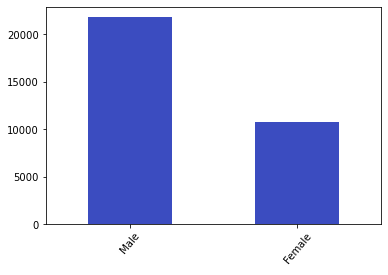

In [133]:
income_df['sex'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

<AxesSubplot:>

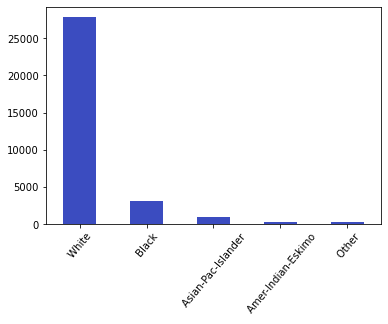

In [134]:
income_df['race'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

<AxesSubplot:>

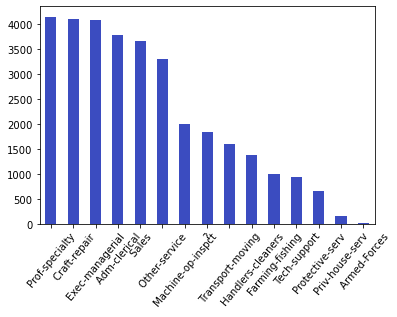

In [135]:
income_df['occupation'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

<AxesSubplot:>

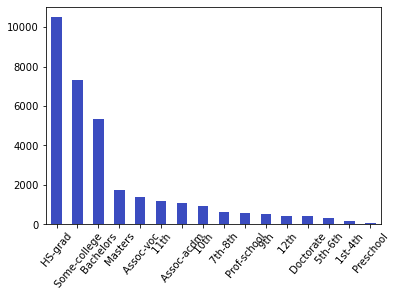

In [136]:
income_df['education'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

<AxesSubplot:>

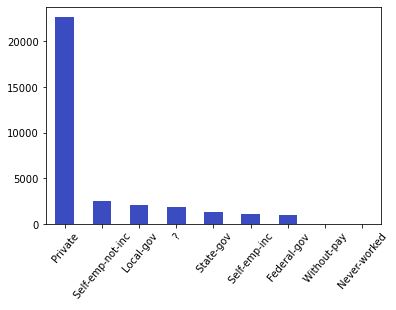

In [137]:
income_df['workclass'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

<AxesSubplot:>

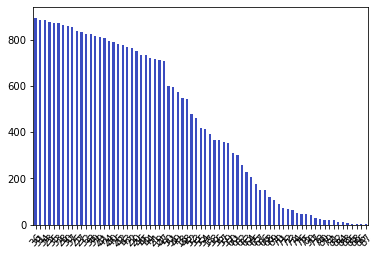

In [138]:
income_df['age'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

<AxesSubplot:>

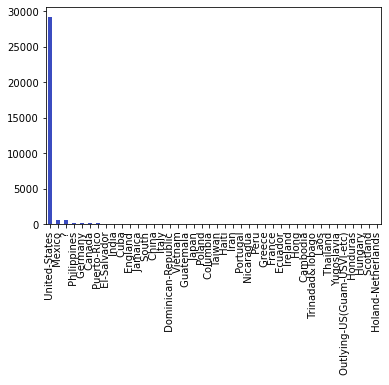

In [139]:
income_df['native_country'].value_counts().plot(kind='bar', rot="90",colormap="coolwarm")

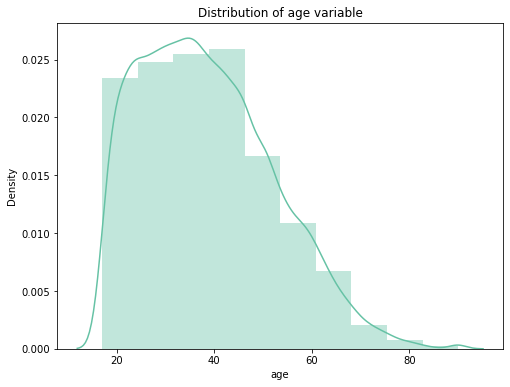

In [140]:
f, ax = plt.subplots(figsize=(8,6))
x = income_df['age']
sns.color_palette("hls", 8)
x = pd.Series(x, name="age")
ax = sns.distplot(x, bins=10)
ax.set_title("Distribution of age variable")
plt.show()

In [141]:
less_40 = income_df[(income_df['hours_per_week']< 40)]
more_40 = income_df[(income_df['hours_per_week']>= 40) & (income_df['hours_per_week']< 50)]['hours_per_week']
more_50 = income_df[(income_df['hours_per_week']>= 50) & (income_df['hours_per_week'] < 60)]['hours_per_week']
more_60 = income_df[(income_df['hours_per_week']>= 60) & (income_df['hours_per_week'] < 70)]['hours_per_week']

In [142]:

a=pd.crosstab(more_40,income_df['income']).sum()
b=pd.crosstab(more_50,income_df['income']).sum()
c=pd.crosstab(more_60,income_df['income']).sum()

In [143]:
a

income
 <=50K    14013
 >50K      4323
dtype: int64

In [144]:
b

income
 <=50K    2149
 >50K     1728
dtype: int64

In [145]:
c

income
 <=50K    1020
 >50K      776
dtype: int64

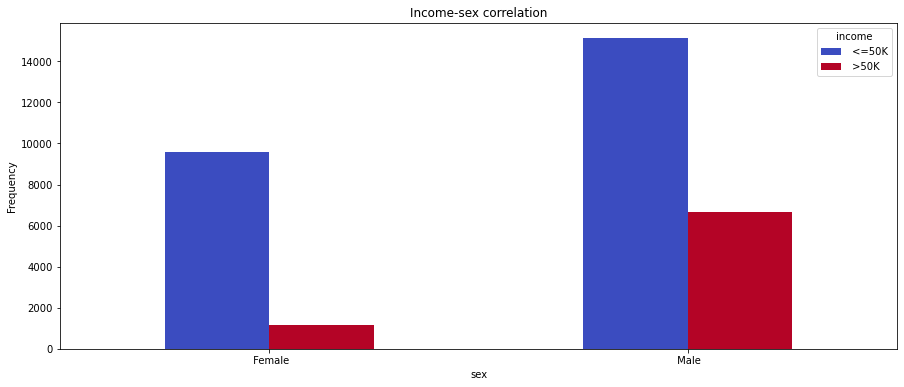

In [146]:
pd.crosstab(income_df['sex'],income_df['income']).plot(kind="bar",figsize=(15,6),colormap="coolwarm")
plt.title('Income-sex correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

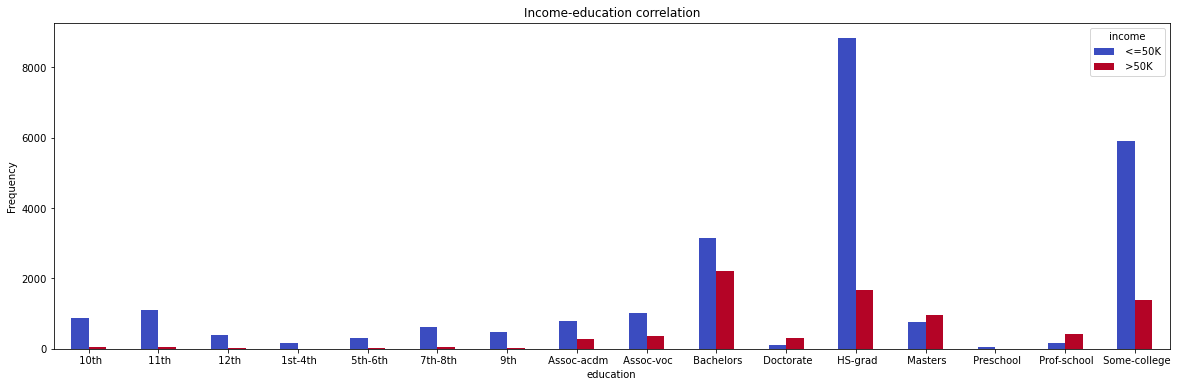

In [147]:
pd.crosstab(income_df['education'],income_df['income']).plot(kind="bar",figsize=(20,6), colormap="coolwarm")
plt.title('Income-education correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

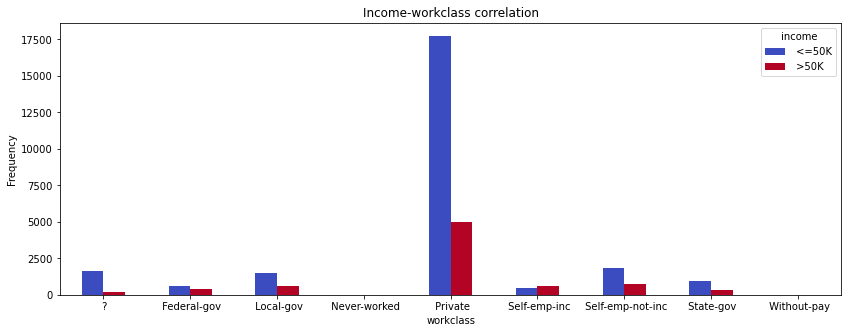

In [148]:
pd.crosstab(income_df['workclass'],income_df['income']).plot(kind="bar",figsize=(14,5), colormap="coolwarm")
plt.title('Income-workclass correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

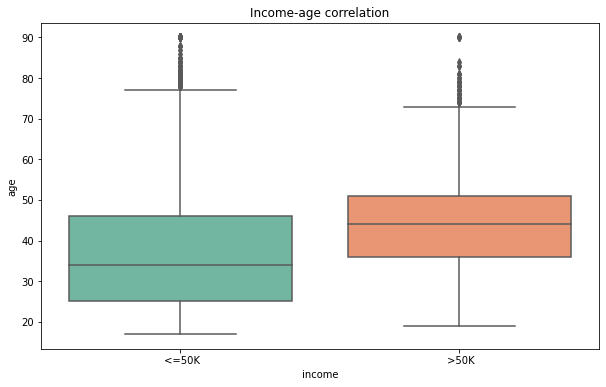

In [149]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("Set2")
ax = sns.boxplot(x="income", y="age", data=income_df)
ax.set_title("Income-age correlation")
plt.show()

In [150]:
# strip the values of spaces
df_obj = income_df.select_dtypes(['object'])
income_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [151]:
def remove_question_mark(dataset):
    for col in dataset.columns:
        dataset[col].replace('?', np.NaN, inplace=True)
    return dataset.info()    
remove_question_mark(income_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [152]:
observations_0 = income_df.shape[0] 
income_df.dropna(inplace=True)
observations_1 = income_df.shape[0] 
print("Number of rows dropped: {}".format(observations_0-observations_1))

Number of rows dropped: 2399


In [153]:
#결혼 정보를 married 하나로 통합하자

income_df['marital_status'] = income_df['marital_status'].replace(["Married-civ-spouse", "Married-AF-spouse",  "Married-spouse-absent"], 'Married')

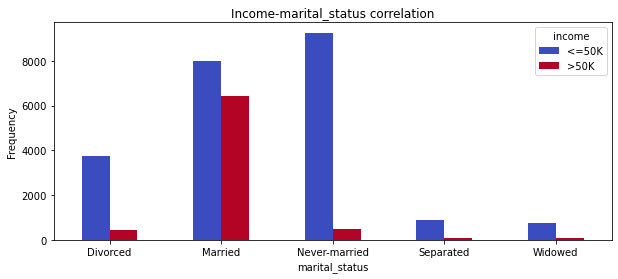

In [154]:

pd.crosstab(income_df['marital_status'],income_df['income']).plot(kind="bar",figsize=(10,4),colormap="coolwarm")
plt.title('Income-marital_status correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [155]:
pd.crosstab(income_df['marital_status'],income_df['income'])

income,<=50K,>50K
marital_status,,
Divorced,3762,452
Married,8016,6440
Never-married,9256,470
Separated,873,66
Widowed,747,80


In [156]:
#capital gain과 loss 정보를 하나로

income_df["capital"] = income_df["capital_gain"] - income_df["capital_loss"]
income_df.drop(["capital_gain", "capital_loss"], inplace=True, axis=1)

In [157]:
#미국 외 다른 나라를 하나로

income_df.loc[(income_df["native_country"] != 'United-States'),'native_country']='Other'

In [158]:
#필요없는 fnlwgt정보와 education(num정보로 대체)

income_df.drop(["fnlwgt", "education"], inplace=True, axis=1)

In [159]:
income_df['relationship'] = income_df['relationship'].replace(["Husband", "Wife"], 'Spouse')

In [160]:
#정답 레이블인 income을 0과 1 정보로

income_df.loc[(income_df["income"] == '<=50K'),'income']= 0
income_df.loc[(income_df["income"] == '>50K'),'income']= 1
income_df["income"] = income_df["income"].astype(int)
label = income_df["income"]
income_df.drop("income", inplace=True, axis=1)

In [161]:
income_df.loc[(income_df["sex"] == 'Female'),'sex']= 0
income_df.loc[(income_df["sex"] == 'Male'),'sex']= 1
income_df["sex"] = income_df["sex"].astype(int)

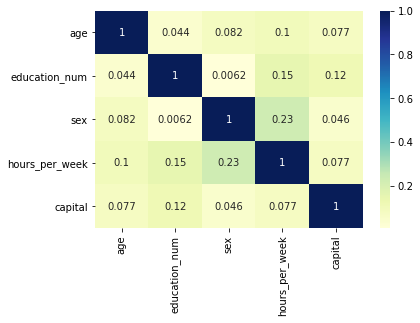

In [164]:
dataplot = sns.heatmap(income_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [165]:
df_encoded = pd.get_dummies(income_df)
df_encoded

,age,education_num,sex,hours_per_week,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Spouse,relationship_Unmarried,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Other,native_country_United-States
0,39,13,1,40,2174,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,1,13,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,38,9,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,1,40,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,28,13,0,40,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32557,40,9,1,40,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32558,58,9,0,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
32559,22,9,1,20,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


숫자가 아닌 object 정보를 수로 변환할 때 dummy를 이용하는 이유는? https://devuna.tistory.com/67

In [166]:
scaler = MinMaxScaler()
df_encoded[['age', 'hours_per_week', "capital", "education_num" ]] = scaler.fit_transform(df_encoded[['age', 'hours_per_week', "capital", "education_num" ]])
df_encoded

,age,education_num,sex,hours_per_week,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Spouse,relationship_Unmarried,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Other,native_country_United-States
0,0.301370,0.800000,1,0.397959,0.062575,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.452055,0.800000,1,0.122449,0.041742,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,0.287671,0.533333,1,0.397959,0.041742,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.493151,0.400000,1,0.397959,0.041742,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0.150685,0.800000,0,0.397959,0.041742,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0,0.377551,0.041742,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32557,0.315068,0.533333,1,0.397959,0.041742,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32558,0.561644,0.533333,0,0.397959,0.041742,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
32559,0.068493,0.533333,1,0.193878,0.041742,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [167]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, label, test_size=0.2)

# 전처리 끝!

1. Logistic Regression


2. Support-vector Machine (SVM)


3. Decision Trees


4. Multylayer Perceptron (MLP)


In [168]:
model_LR= LogisticRegression()

parameters_log = {
    'solver': ['liblinear', "saga"],
    'C': [0.1, 1, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.5, 0.2, 0.7]
    }

In [169]:
grid_log = GridSearchCV(model_LR, param_grid = parameters_log, scoring='accuracy', cv=5)
grid_log.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 0.01], 'l1_ratio': [0.5, 0.2, 0.7],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [170]:
print("Tuned Hyperparameters :", grid_log.best_params_)
print("Accuracy :",grid_log.best_score_)

y_pred_train_log = grid_log.predict(X_train)
y_pred_test_log = grid_log.predict(X_test)
accuracy_log = accuracy_score(y_test.to_list(), y_pred_test_log)

print("Accuracy on train data: {}".format(accuracy_score(y_train.to_list(), y_pred_train_log)))
print("Accuracy on test data: {}".format(accuracy_log))

Tuned Hyperparameters : {'C': 1, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8433833745965827
Accuracy on train data: 0.8446682415350822
Accuracy on test data: 0.8375600861926074


In [171]:
print("Test accuracy for Logistic Regression: ",accuracy_log)

Test accuracy for Logistic Regression:  0.8375600861926074


<AxesSubplot:>

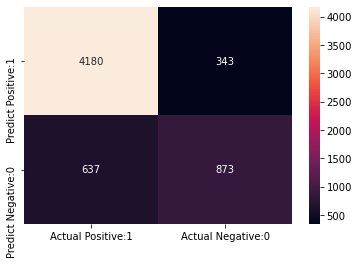

In [172]:
cm_matrix_log = pd.DataFrame(data=confusion_matrix(y_test,y_pred_test_log), columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_log, annot=True, fmt='d')